<a href="https://colab.research.google.com/github/krishnamittal01/data-science/blob/main/Linear_Regression_using_Sk_learn_implimentation_and_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv("/content/height-weight.csv")

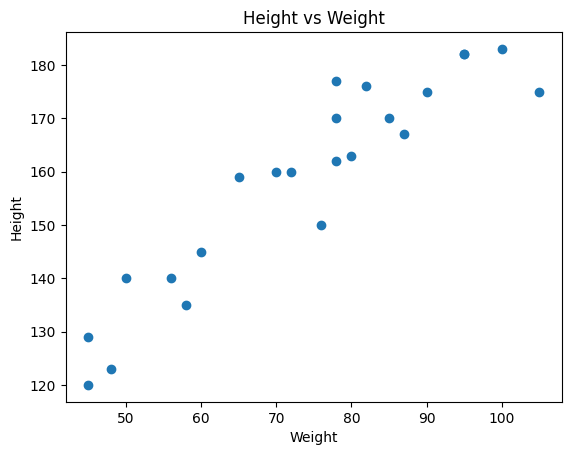

In [8]:
##scateer
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight")
plt.show()


Finding the correlation

In [9]:
## correlation between weight and height

df.corr() ## here the pearson correlation is used

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Using Seaborn for Visualisation


In [10]:
import seaborn as sns

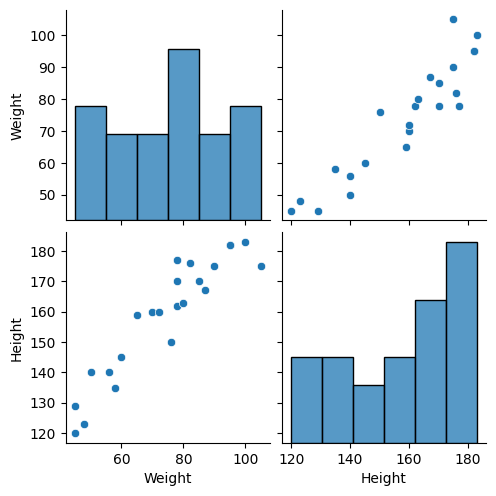

In [11]:
sns.pairplot(df)

In [12]:
## dividing my features as Independent or Dependent
X=df['Weight']  ## always remember that your independent feature should be present in dataframe type not in series and could be converted by using[[]]
Y=df['Height']
X,Y

(0      45
 1      58
 2      48
 3      60
 4      70
 5      78
 6      80
 7      90
 8      95
 9      78
 10     82
 11     95
 12    105
 13    100
 14     85
 15     78
 16     50
 17     65
 18     76
 19     87
 20     45
 21     56
 22     72
 Name: Weight, dtype: int64,
 0     120
 1     135
 2     123
 3     145
 4     160
 5     162
 6     163
 7     175
 8     182
 9     170
 10    176
 11    182
 12    175
 13    183
 14    170
 15    177
 16    140
 17    159
 18    150
 19    167
 20    129
 21    140
 22    160
 Name: Height, dtype: int64)

In [13]:
X=df[['Weight']]  ## always remember that your independent feature should be present in dataframe type not in series and could be converted by using[[]]
## or a 2D array               ## SUPER IMPORTANT

In [14]:
 # NOW I'LL CREATE THE DEPENDENT FEATURE  AND THE DEPENDENT FEATURE CAN BE IN SERIES or can be in 1D array
Y=df['Height']

In [15]:
### TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

X_train.shape

(17, 1)

Let's say we have two features one is **X** and second one is **Y** and the data points and both are of different units and we know that in **linear regression** we use  gradient descent where we use scaler so in that if the value is higher to come to the local minima it takes time .So take up each indepent feature and apply **z-score** which converts all the values to **mean=0** and **standard deviation=1**

In [17]:
## this is also known as standardisation

from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)  ## by using this the data is tranformed by z score

In [19]:
## Apply  Simple linear regression
from sklearn.linear_model import LinearRegression

In [20]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [21]:
print("coefficient or slope :",regression.coef_)   ## coeff is the slope(beta 1)
print("Intercept:",regression.intercept_)

coefficient or slope : [17.2982057]
Intercept: 156.47058823529412


In [22]:
##1 unit movement in the weight value that means 17.298 value movement in the intercept value  is the coefficient
### 156.47 is the point where the the line intersect to the y axis is also known as intercept

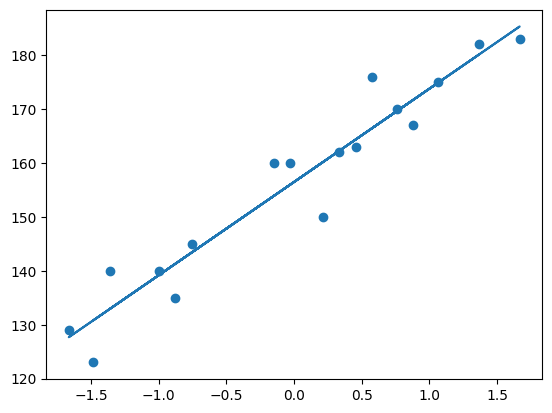

In [26]:
### plot trainimg data  plot best fit line

plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [27]:
## to do the prediction for the test data
#1. Predicted  height output= intercept + coef_(Weights)
##Y_pred_test=156.470+17.298(X_test)

Y_pred=regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [29]:
##performance metrics

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [30]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


1886933.5397307759
1336.1312312741586
1373.6569949338793


**R-SQUARE**

Formula

  **R^2=1- SSR/SST**
  R^2= coeff. of determination  SSR= sum of squares of residuals SST =total sum of squares

In [31]:
from sklearn.metrics import r2_score

In [32]:
score=r2_score (Y_test,Y_pred)
print(score)

-4335.393707648128


In [33]:
## ADJUSTED R- SQUARED



In [34]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-5419.49213456016

In [35]:
####ols technique


In [36]:
import statsmodels.api as sm

In [38]:
model=sm.OLS(Y_train,X_train).fit()

In [39]:
prediction=model.predict(X_test)
print(prediction)

15    1349.260045
9     1349.260045
0      778.419257
8     1643.329542
17    1124.383371
12    1816.311599
dtype: float64


In [40]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 16 Apr 2025   Prob (F-statistic):                       0.664
Time:                        06:57:30   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
